In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
from scipy import signal

from IPython.display import Image  
%matplotlib inline
params = {'legend.fontsize': 24,
          'figure.figsize': (8, 8),
         'axes.labelsize': 24,
         'axes.titlesize': 24,
         'xtick.labelsize':24,
         'ytick.labelsize':24}
plt.rcParams.update(params) 


#### Ejercicio 1

El circuito de la figura corresponde amplificador "clase C" realizado con un MOSFET, para una portadora de 1 MHz.

<img src="./fig/circuito1.png">


$V_{GS} =  20 V $

$V_{GG} =  -10 V $



Se asume la impedancia del dispositivo a su salida entre  Drain  y Source es lo suficientemente elevada como para desestimarla frente a la carga.

|Symbol        | Parameter                  | Value | Unit |   
|--------------|----------------------------|-------|------|
|$V_{(BR)DSS}$ |  Drain source voltage      | 200   | V    |
|$V_{GS}     $ |  Gate source voltage       | 100   | V    |
|$I_{D}      $ |  Drain current             | 10    | A    |
|$V_{(min)DS}$ |  Drain source voltage min. | 10    | V    |

La tensión de excitación en Gate es absolutamente senoidal.

<img src="./fig/vgs_id_2.png"> 


El Q cargado de ambos tanques (Gate y  Drain) es de $10$ .

Determinar:

   1. ángulo de circulación $\theta$
   2. Valores instantaneos de $i_d$.
   3. $I_{do}$, $I_{d1}$, $I_{d2}$ e $I_{d3}$.
   4. $R_L$, $L_2$ y $C_2$. ¿Es esta una adaptación a MTE con Q constante?.
   5. $P_{dc}$ .
   6. $P_{RL}$ .
   7. $P_{MOSFET}$ y rendimiento.
   8. $P_{RL}$ de sengunda armonica.
   9. Determinar el valor de VGG tal que se tengan $50$ W en la resistencia de carga $RL$ .






In [2]:
#parametros de la senal 
fc = 1e6

# muestreo (empleando 24 ya que corresponde a el muestreo del empleado comunmente en el metodo de los trapecios)
ns  = 24       
#parametros del filtro de salida
Qc = 10

#parametros del transistor
Vds_min = 10 
Vds_max = 200

Vs  =  20.00 
VGG = -10.00

# 1.ángulo de circulación $\theta$



In [3]:
thc = np.arccos( (2-VGG)/Vs )

print(' th = {:.2f}'.format(thc*180/np.pi ))

print(thc)

 th = 53.13
0.927295218002


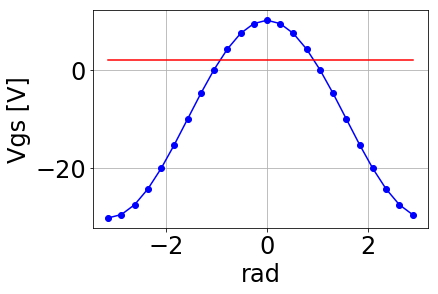

In [4]:
def vgsi(VGG,Vs,th):
    return VGG+Vs*np.cos(th)

thi = np.arange(-np.pi,np.pi,2*np.pi/ns)
vgs = list()
vgs = (vgsi(VGG, Vs, thi))

plt.plot(thi,vgs, 'bo-')
plt.plot(thi,[2 for t in thi] , 'r-')
plt.xlabel('rad')
plt.ylabel('Vgs [V]')
plt.grid()
plt.show()

# 2. Valores instantaneos de $i_d$


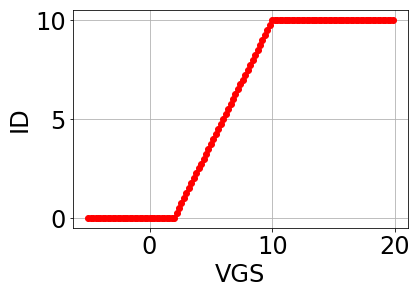

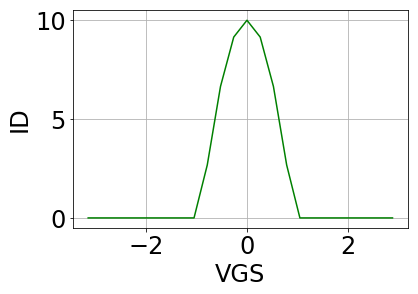

0.00 10.00
15.00 9.15
30.00 6.65
45.00 2.68
60.00 0.00
75.00 0.00
90.00 0.00
105.00 0.00
120.00 0.00
135.00 0.00
150.00 0.00
165.00 0.00


In [6]:
# Transferencia del MOSFET
def idi(v):
    i = list()
    for vi in v:
        if (vi < 2.)                : i.append(0.)
        elif (vi >= 2  and vi < 10) : i.append((10./8.)*(vi-2.)) 
        else                        : i.append(10.) 
    return np.array(i)

# Plot de la transferencia del MOSFET
vs  = np.arange(-5.,20.,0.2)
ids = idi(vs)

plt.plot(vs,ids,'ro')
#plt.axis([-10, 10, -1, 11])
plt.ylabel('ID')
plt.xlabel('VGS')
plt.grid()
plt.show()

ids = idi(vgs)
plt.plot(thi,ids,'g')
#plt.axis([-10, 10, -1, 11])
plt.ylabel('ID')
plt.xlabel('VGS')
plt.grid()
plt.show()

for p,i in zip(thi,idi(vgs)):
    if p  >= 0 :print('{:1.2f} {:1.2f}'.format(p*180/np.pi, i) )

# 3. $I_{do}$, $I_{d1}$, $I_{d2}$ e $I_{d3}$.

Tabla de calculos para el metodo de los trapecios

| $\theta_m(i)$  |$vgs(\theta_m)$ |  $id(\theta_m)$ | $id(\theta_m) \cdot cos(\theta_m) $ |$id(\theta_m) \cdot cos(2 \theta_m) $ |$id(\theta_m) \cdot cos(3 \theta_m) $ |
|----|----|----|----|----|----|
|0.00| 10.00| 10.00| 10.00| 10.00 |
|15.00| 9.32| 9.15| 8.84| 7.92 |
|30.00| 7.32| 6.65| 5.76| 3.33 |
|45.00| 4.14| 2.68| 1.89| -0.00 |
|60.00| -0.00| 0.00| 0.00| -0.00 |
|75.00| -4.82| 0.00| 0.00| -0.00 |
|90.00| -10.00| 0.00| -0.00| -0.00 |
|105.00| -15.18| 0.00| -0.00| -0.00 |
|120.00| -20.00| 0.00| -0.00| -0.00 |
|135.00| -24.14| 0.00| -0.00| 0.00 |
|150.00| -27.32| 0.00| -0.00| 0.00 |
|165.00| -29.32| 0.00| -0.00| 0.00 |


###   Componente de continua $I_{do}$

$I_{do} = \frac{1}{n} \sum_{i=1}^{n} idc_1(\theta_m(i))$

donde n es el número de muestras. 

Por el metodo de los trapecios, primero obtenemos la tabla para 24 muestras.

La ecuación puede simplificarse a por su simetria par:

$I_{do} = \frac{1}{12} \sum_{i=1}^{\frac{n}{2}} idc_1(\theta_m(i))$

Aplicando metodo de los trapecios:

$I_{do} = \frac{1}{12} [ \frac{id(0)}{2} +id(15) +id(30) +id(45)+ id(60) +id(75) + id(90) id(105) +id(120) +id(135) +id(150) +id(165)   ]$

$I_{do} = \frac{1}{12} [ \frac{10}{2} +9.15 +6.65 +2.68 + 0 ]$

$I_{do} = 1.956 A$

###   Componente de fundamental $I_{d1}$

$ I_{d1} = \frac{1}{n} \sum_{i=0}^{n} idc_1(\theta_m(i)) \cdot cos(\theta_m(i) \cdot 1) $


$I_{d1} = \frac{1}{n} \sum_{i=1}^{n} idc_1(\theta_m(i))$

donde n es el número de muestras. 

Por el metodo de los trapecios, primero obtenemos la tabla para 24 muestras.

 
La ecuación puede simplificarse a por su simetria par:

$I_{d1} = \frac{1}{6} \sum_{i=0}^{\frac{n}{2}} idc_1(\theta_m(i)) \cdot cos(\theta_m(i) \cdot 1) $

Aplicando metodo de los trapecios:

$I_{d1} = \frac{1}{6} [ \frac{id(0)}{2} +id(15)\cdot cos(15) +id(30) \cdot cos(30) +id(45) \cdot cos(45)+ id(60) \cdot cos(60) +id(75) \cdot cos(75) + id(90) \cdot cos(90)  ]$

$I_{d1} = \frac{1}{6} [ \frac{10}{2} +9.00 +6.34 +2.93 + 0 ]$

$I_{d1} = 3.582A$

###   Componente de segundo armonico $I_{d2}$

De igual manera: 

$I_{d2} = \frac{1}{6} [ \frac{id(0)}{2} +id(15)\cdot cos(2 \cdot 15) +id(2 \cdot 30) \cdot cos(2 \cdot 30) +id(2 \cdot 45) \cdot cos(2 \cdot 45)+ id(60) \cdot cos(2 \cdot 60) +id(75) \cdot cos(2 \cdot 75) + id(90) \cdot cos(2 \cdot 90)  ]$

$I_{d2} = \frac{1}{6} [ \frac{10}{2} +8.84 +5.76 +1.89 + 0 ]$

$I_{d2} = 2.708 A$


###   Componente de fundamental $I_{d3}$

$I_{d3} = \frac{1}{6} [ \frac{id(0)}{2} +id(15)\cdot cos(3 \cdot 15) +id(3 \cdot 30) \cdot cos(3 \cdot 30) +id(3 \cdot 45) \cdot cos(3 \cdot 45)+ id(60) \cdot cos(3 \cdot 60) +id(75) \cdot cos(3 \cdot 75) + id(90) \cdot cos(3 \cdot 90)  ]$

$I_{d3} = \frac{1}{6} [ \frac{10}{2} +7.92 +3.33  + 0 ]$


$I_{d3} = 1.596 A$

In [7]:
# Calculos !
for i,p in enumerate(thi):
    if p  >= 0 :
        print('|{:1.2f}| {:1.2f}| {:1.2f}| {:1.2f}| {:1.2f} |'.format( 
            p*180/np.pi, vgs[i], ids[i], ids[i]*np.cos(p) , ids[i]*np.cos(2*p), ids[i]*np.cos(3*p)   ) ) 
        
     

|0.00| 10.00| 10.00| 10.00| 10.00 |
|15.00| 9.32| 9.15| 8.84| 7.92 |
|30.00| 7.32| 6.65| 5.76| 3.33 |
|45.00| 4.14| 2.68| 1.89| -0.00 |
|60.00| -0.00| 0.00| 0.00| -0.00 |
|75.00| -4.82| 0.00| 0.00| -0.00 |
|90.00| -10.00| 0.00| -0.00| -0.00 |
|105.00| -15.18| 0.00| -0.00| -0.00 |
|120.00| -20.00| 0.00| -0.00| -0.00 |
|135.00| -24.14| 0.00| -0.00| 0.00 |
|150.00| -27.32| 0.00| -0.00| 0.00 |
|165.00| -29.32| 0.00| -0.00| 0.00 |


In [8]:
# Continua
idco = 1/ns * np.sum(ids) 


# primer arminico
idc1 = 2/ns * np.sum([ids[i]*np.cos(1*thi[i]) for i in range(ns)] ) 

# segundo arminico
idc2 = 2/ns * np.sum([ids[i]*np.cos(2*thi[i]) for i in range(ns)] ) 

# segundo arminico
idc3 = 2/ns * np.sum([ids[i]*np.cos(3*thi[i]) for i in range(ns)] ) 

print('idco= {:.3f} A, idc1={:.3f} A, idc2={:.3f} A, idc3={:.3f} A '.format(idco,idc1,idc2,idc3) )        

idco= 1.956 A, idc1=3.582 A, idc2=2.708 A, idc3=1.596 A 


# 4. $R_L$, $L_2$ y $C_2$. ¿Es esta una adaptación a MTE con Q constante?.

In [9]:
#calculo de la resistencia de carga de salida teniendo la portadora en pico para el primer armonico de la modulante
VDD = 100 
VRL = (VDD -Vds_min )  
RL  = VRL / idc1 

print('RL= {:.2f} ohm, VRL={:.2f} V'.format(RL,VRL) )


RL= 25.13 ohm, VRL=90.00 V


In [10]:
L = RL / (2*np.pi*fc*Qc)
C = 1 / ((2*np.pi*fc)**2 * L)
print('L = {:.2e} Hy'.format(L)  )
print('C = {:.2e} F'.format(C)  )

L = 4.00e-07 Hy
C = 6.33e-08 F


# 5. $P_{dc}$ .

In [11]:
# 
PDC = idco * VDD


print('PDC= {:.2f} W'.format(PDC) )


PDC= 195.64 W


#  6. $P_{RL}$ .

In [12]:
PRL = idc1 * VRL / 2


print('PRL={:.2f} W'.format(PRL) )


PRL=161.17 W


#   7. $P_{MOSFET}$ y rendimiento.

In [13]:
PTR = PDC - PRL

print('PTR={:.2f} W'.format(PTR) )

neff = PRL/PDC 
print('rendimiento = {:.2f} '.format(neff)  )

PTR=34.47 W
rendimiento = 0.82 


# 8. $P_{RL}$ de sengunda armonica.

Estos pulsos de corriente son filtrados por un simple sintonizado. 

La componente de segunda armonica entonces debe ser filtrada. 

In [14]:
A = 1/(1+ Qc**2 * (2*fc/fc - fc/(fc*2) )**2 )**(1/2)

VD2 =  (A*idc2*RL)

print(VD2)

PRL2 = VD2**2/2/RL 

print('PRL2={:.2f} W'.format(PRL2) )


4.52646102676
PRL2=0.41 W


# 9. Determinar el valor de VGG tal que se tengan $50$ W en la resistencia de carga $RL$ .


In [15]:
PRLo =   50                  # Potencia en la carga
VRLo = (PRLo*2*RL)**(1/2)    # Tensión sobre RL
id1o = VRLo/RL               # Componente fundamental de la corriente en la carga
print(VRL, id1o)




90 1.99487525733
